### ✅ 1. EDA + Preprocessing Checklist
#### A. EDA Steps
- Understand data shape & types
- Check for missing values
- Identify duplicate rows
- Analyze categorical & numerical features
- Identify outliers
- Check feature distributions (normality, skewness)
- Correlation analysis
- Summary statistics

#### B. Preprocessing Steps
- Handle missing values
- Remove duplicates
- Treat outliers
- Encode categorical variables (Label/One-Hot)
- Check & fix skewness (log/sqrt transform)
- Feature scaling (StandardScaler / MinMaxScaler)
- Normality tests (Shapiro-Wilk, Jarque-bera)
- Optional: Dimensionality reduction / Feature selection

### 🧪 2. Python Code – Data Generation + Preprocessing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
#from sklearn.model_selection import train_test_split

from scipy.stats import shapiro, normaltest, zscore

In [27]:
# -----------------------------
# STEP 1: Generate Sample Dataset
# -----------------------------

np.random.seed(42)
n = 200

data = {
    'age': np.random.normal(35, 10, n).tolist(),
    'salary': np.random.normal(60000, 15000, n).tolist(),
    'department': np.random.choice(['IT', 'HR', 'Sales', 'Finance'], n),
    'experience': np.random.randint(1, 15, size=n),
    'gender': np.random.choice(['Male', 'Female'], n)
}

df = pd.DataFrame(data)
df

,age,salary,department,experience,gender
0,39.967142,65366.810405,Sales,8,Female
1,33.617357,68411.767896,Sales,2,Female
2,41.476885,76245.768648,IT,13,Male
3,50.230299,75807.030781,IT,10,Female
4,32.658466,39334.959481,Finance,14,Female
...,...,...,...,...,...
195,38.853174,52962.365218,HR,9,Female
196,26.161426,34302.982064,HR,13,Female
197,36.537251,80308.085612,Finance,10,Male
198,35.582087,58281.902321,Sales,9,Female


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         200 non-null    float64
 1   salary      200 non-null    float64
 2   department  200 non-null    object 
 3   experience  200 non-null    int32  
 4   gender      200 non-null    object 
dtypes: float64(2), int32(1), object(2)
memory usage: 7.2+ KB


In [29]:
# Introduce missing values
for col in ['age', 'salary']:
    df.loc[np.random.choice(df.index, size=10, replace=False), col] = np.nan

# Introduce duplicates
df = pd.concat([df, df.iloc[:5]], ignore_index=True)

# Add outliers
df.loc[5, 'salary'] = 250000  # High outlier
df.loc[10, 'age'] = 99        # High outlier

#### Initial EDA

In [30]:
#Checking Shape
df.shape

(205, 5)

In [31]:
#Checking Missing Values
df.isnull().sum()

age           10
salary        11
department     0
experience     0
gender         0
dtype: int64

In [32]:
#Checking Duplicacy
df.duplicated().sum()

5

In [33]:
#Checking data Statistics
df.describe()

,age,salary,experience
count,195.000000,194.000000,205.000000
mean,35.304324,62562.402002,7.487805
std,10.287989,20074.215724,4.034909
min,8.802549,11380.989899,1.000000
25%,28.215266,51134.704037,4.000000
50%,35.582087,61341.525783,8.000000
75%,40.647086,71340.754750,11.000000
max,99.000000,250000.000000,14.000000


In [34]:
df.describe(include = 'object')

,department,gender
count,205,205
unique,4,2
top,IT,Male
freq,56,109


#### Visual Checks

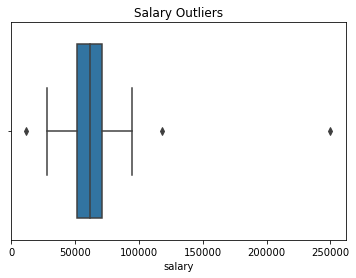

In [35]:
sns.boxplot(x=df['salary'])
plt.title("Salary Outliers")
plt.show()

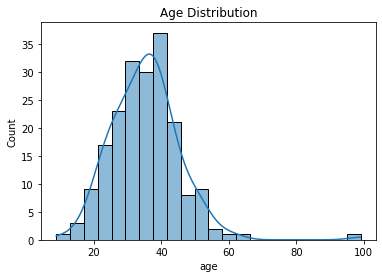

In [36]:
sns.histplot(df['age'], kde=True); plt.title("Age Distribution"); plt.show()

In [37]:
# -----------------------------
# STEP 3: Remove Duplicates
# -----------------------------
df = df.drop_duplicates()

In [38]:
#Checking Duplicacy
df.duplicated().sum()

0

In [39]:
# -----------------------------
# STEP 4: Handle Missing Values
# -----------------------------
num_features = ['age', 'salary', 'experience']
cat_features = ['department', 'gender']

imputer = SimpleImputer(strategy='median')
df[num_features] = imputer.fit_transform(df[num_features])

In [40]:
#Checking Missing Values
df.isnull().sum()

age           0
salary        0
department    0
experience    0
gender        0
dtype: int64

In [41]:
# -----------------------------
# STEP 5: Outlier Treatment using Z-Score
# -----------------------------
z_scores = np.abs(zscore(df[num_features]))
df = df[(z_scores < 3).all(axis=1)]
df

,age,salary,department,experience,gender
0,39.967142,61182.590232,Sales,8.0,Female
1,33.617357,68411.767896,Sales,2.0,Female
2,41.476885,76245.768648,IT,13.0,Male
3,50.230299,75807.030781,IT,10.0,Female
4,32.658466,39334.959481,Finance,14.0,Female
...,...,...,...,...,...
195,38.853174,52962.365218,HR,9.0,Female
196,26.161426,34302.982064,HR,13.0,Female
197,36.537251,80308.085612,Finance,10.0,Male
198,35.582087,58281.902321,Sales,9.0,Female


In [42]:
df.describe()

,age,salary,experience
count,198.000000,198.000000,198.000000
mean,34.890378,61467.520233,7.424242
std,9.052294,14505.458985,4.029311
min,8.802549,11380.989899,1.000000
25%,28.310286,51395.866801,4.000000
50%,35.356053,61182.590232,7.000000
75%,39.931537,70220.462486,11.000000
max,62.201692,117790.972360,14.000000


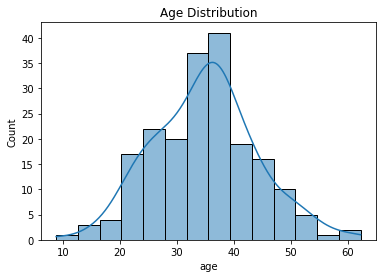

In [43]:
sns.histplot(df['age'], kde=True); plt.title("Age Distribution"); plt.show()

In [21]:
# -----------------------------
# STEP 6: Encode Categorical Variables
# -----------------------------
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)
df_encoded

,age,salary,experience,department_HR,department_IT,department_Sales,gender_Male
0,39.967142,61182.590232,8.0,0,0,1,0
1,33.617357,68411.767896,2.0,0,0,1,0
2,41.476885,76245.768648,13.0,0,1,0,1
3,50.230299,75807.030781,10.0,0,1,0,0
4,32.658466,39334.959481,14.0,0,0,0,0
...,...,...,...,...,...,...,...
195,38.853174,52962.365218,9.0,1,0,0,0
196,26.161426,34302.982064,13.0,1,0,0,0
197,36.537251,80308.085612,10.0,0,0,0,1
198,35.582087,58281.902321,9.0,0,0,1,0


In [22]:
# -----------------------------
# STEP 7: Normality Tests
# -----------------------------
for col in ['age', 'salary', 'experience']:
    stat, p = shapiro(df[col])
    print(f"{col} - Shapiro-Wilk Test: p = {p:.4f}")
    if p < 0.05:
        print(f"{col} is not normally distributed.\n")

age - Shapiro-Wilk Test: p = 0.5493
salary - Shapiro-Wilk Test: p = 0.1196
experience - Shapiro-Wilk Test: p = 0.0000
experience is not normally distributed.



In [23]:
# -----------------------------
# STEP 8: Fix Skewness if needed (Log Transform)
# -----------------------------
df_encoded['experience'] = np.log1p(df_encoded['experience'])

In [24]:
df_encoded

,age,salary,experience,department_HR,department_IT,department_Sales,gender_Male
0,39.967142,61182.590232,2.197225,0,0,1,0
1,33.617357,68411.767896,1.098612,0,0,1,0
2,41.476885,76245.768648,2.639057,0,1,0,1
3,50.230299,75807.030781,2.397895,0,1,0,0
4,32.658466,39334.959481,2.708050,0,0,0,0
...,...,...,...,...,...,...,...
195,38.853174,52962.365218,2.302585,1,0,0,0
196,26.161426,34302.982064,2.639057,1,0,0,0
197,36.537251,80308.085612,2.397895,0,0,0,1
198,35.582087,58281.902321,2.302585,0,0,1,0


In [25]:
# -----------------------------
# STEP 9: Feature Scaling
# -----------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns)

In [26]:
df_scaled

,age,salary,experience,department_HR,department_IT,department_Sales,gender_Male
0,0.562248,-0.019693,0.363656,-0.627986,-0.612372,1.743794,-1.084354
1,-0.140986,0.479947,-1.533996,-0.627986,-0.612372,1.743794,-1.084354
2,0.729451,1.021389,1.126841,-0.627986,1.632993,-0.573462,0.922208
3,1.698885,0.991065,0.710277,-0.627986,1.632993,-0.573462,-1.084354
4,-0.247183,-1.529677,1.246013,-0.627986,-0.612372,-0.573462,-1.084354
...,...,...,...,...,...,...,...
193,0.438877,-0.587828,0.545647,1.592393,-0.612372,-0.573462,-1.084354
194,-0.966725,-1.877458,1.126841,1.592393,-0.612372,-0.573462,-1.084354
195,0.182390,1.302153,0.710277,-0.627986,-0.612372,-0.573462,0.922208
196,0.076606,-0.220172,0.545647,-0.627986,-0.612372,1.743794,-1.084354
